In [1]:
import torch
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import seaborn as sns
from src import BayesianBincaryClassifier

In [2]:
x_train, y_train = make_moons(n_samples=100, noise=0.3, random_state=0)

In [3]:
model = BayesianBincaryClassifier(
    dim_in=2,
    dim_hidden=15,
    n_layers=5,
    lr=0.1
).cuda()

x_train_tensor = torch.from_numpy(x_train).float().cuda()
y_train_tensor = torch.from_numpy(y_train).view(-1, 1).float().cuda()

model.fit(
    x=x_train_tensor,
    y=y_train_tensor,
)
model.df_metrics

,loss,p_item_average
epoch,,
0,503.176422,0.000000e+00
1,151.179413,0.000000e+00
2,87.083878,1.513396e-38
3,39.036858,1.113033e-17
4,36.997234,8.556680e-17
...,...,...
995,0.509851,6.005851e-01
996,0.461222,6.305129e-01
997,0.522148,5.932450e-01


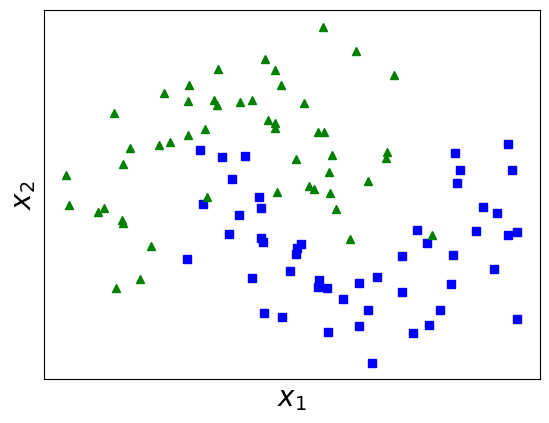

In [4]:
X = x_train
y = y_train
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [5]:
model = model.eval().cpu()
x_test, y_test = make_moons(n_samples=1000, noise=0.3, random_state=42)
x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).view(-1, 1).float()

y_pred_test_tensor = torch.nn.Sigmoid()(model(x_test_tensor.expand(5000, 1000, 2)))

In [6]:
y_pred_test = y_pred_test_tensor.cpu().detach().numpy()

<Axes: ylabel='Count'>

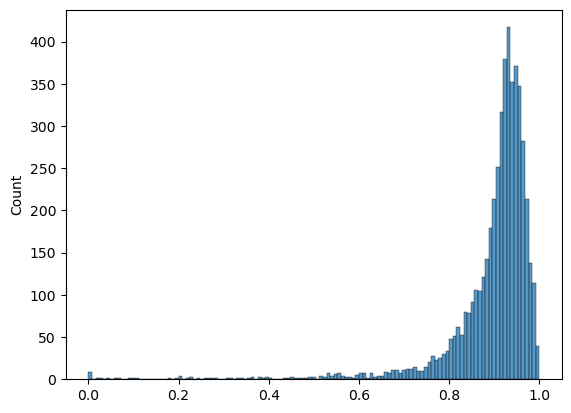

In [7]:
sns.histplot(data=y_pred_test[:, 1, 0])

In [8]:
((y_pred_test.mean(axis=0).reshape(-1) > 0.5).astype("int") == y_test).sum() / len(y_test)

np.float64(0.86)